In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

## Batch Gradient Descent

Cost Function for Linear Regression:
$$J(\theta)=\frac{1}{2m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2$$

where the hypothesis $h_\theta(x)$ is:
$$h_\theta(x)=\theta^Tx=\theta_0+\theta_1x_1+\theta_2x_2...$$

In [1]:
def computeCost(X, y, theta):
    """ Compute cost for linear regression
    
    Compute cost of using theta as the parameter for linear regression
    to fit the data points in X and y
    """
    
    m = len(y)
    J = 1/(2*m) * sum((X.dot(theta) - y) ** 2)
    
    return J

Simultaneously update $\theta_j$ for all $j$:
$$\theta_j:=\theta_j-\alpha\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}$$

In [60]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """ Performs batch gradient descent to learn theta
    
    Updates theta by taking num_iters gradient steps with
    learning rate alpha
    """
    
    m = len(y)
    J_history = np.zeros((num_iters, 1))
    
    for i in range(num_iters):
        
        # Perform a single gradient step on the parameter vector theta
        theta = theta - (alpha/m) * (X.dot(theta) - y).T.dot(X).T
        
        # Save the cost J in every iteration
        J_history[i] = computeCost(X, y, theta)
        
    return theta, J_history

## Linear Regression - Single Variable

### Load Data

Text(0.5,0,'Population of City in 10,000s')

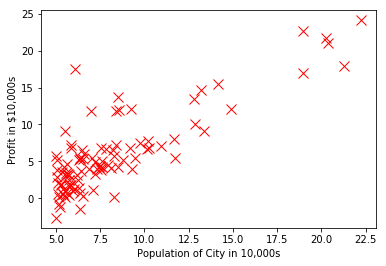

In [6]:
# Load data
data = np.loadtxt('data/ex1data1.csv', delimiter=',')

# Split into target and feature, use reshape to make 2D
m = len(data)
X = data[:, 0].reshape(m, 1)
y = data[:, 1].reshape(m, 1)

# Plot data
plt.plot(X, y, 'rx', markersize=10)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')

### Fit Model Using Gradient Descent

In [89]:
# Add column of ones to X to accommodate intercept term
o = np.ones(m).reshape(m, 1)
X = np.concatenate((o, X), axis=1)

# Initialise fitting parameters to 0
theta = np.zeros((2, 1))

# Run gradient descent with learning rate 0.01 over 1500 iterations
theta, J_history = gradientDescent(X, y, theta, alpha=0.01, num_iters=1500)

# Output results
print('theta_0 Intercept  = %0.3f' % theta[0])
print('theta_1 Population = %0.3f' % theta[1])

theta_0 Intercept  = -3.630
theta_1 Population = 1.166


### Visualize Model

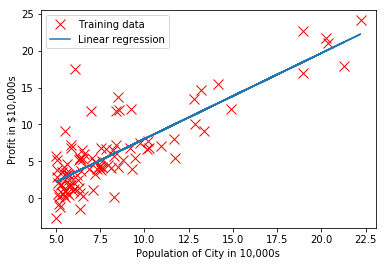

In [15]:
plt.plot(X[:, 1], y, 'rx', markersize=10, label='Training data')
plt.plot(X[:, 1], np.dot(X, theta), '-', label='Linear regression')

plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend()

### Visualize Cost $J(\theta)$

In [17]:
# Grid over which we will calculate J
theta0_vals = np.arange(-10, 10, 0.5)
theta1_vals = np.arange(-1, 4, 0.1)

# Initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Fill out J_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_vals[i], theta1_vals[j]]).reshape(2,1)
        J_vals[i, j] = computeCost(X, y, t)
        
# Create meshgrid
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)

#### Surface Plot

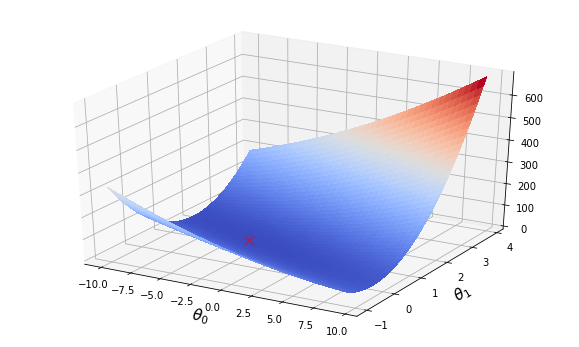

In [18]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')

ax.plot_surface(theta0_vals, theta1_vals, J_vals.T,
                       cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.plot(theta[0], theta[1], 'rx', markersize=10, linewidth=2)

plt.xlabel(r'$\theta_0$', fontsize=15)
plt.ylabel(r'$\theta_1$', fontsize=15)

#### Contour Plot

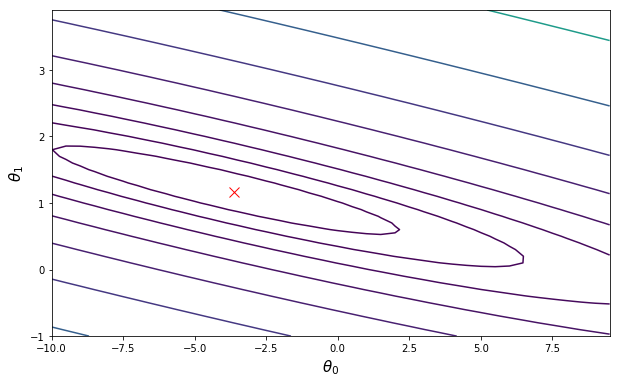

In [19]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca()

ax.contour(theta0_vals, theta1_vals, J_vals.T, np.logspace(-2, 3, 20))
plt.plot(theta[0], theta[1], 'rx', markersize=10, linewidth=2)

plt.xlabel(r'$\theta_0$', fontsize=15)
plt.ylabel(r'$\theta_1$', fontsize=15)

## Linear Regression - Multiple Variables

### Load Data

In [78]:
# Load data
data = np.loadtxt('data/ex1data2.csv', delimiter=',')

# Split into target and feature, use reshape to make 2D
m = len(data)
X = data[:, [0,1]].reshape(m, 2)
y = data[:, 2].reshape(m, 1)

# Print top 5 rows - Square Feet, Num Bedrooms
X[:5, :]

array([[  2.10400000e+03,   3.00000000e+00],
       [  1.60000000e+03,   3.00000000e+00],
       [  2.40000000e+03,   3.00000000e+00],
       [  1.41600000e+03,   2.00000000e+00],
       [  3.00000000e+03,   4.00000000e+00]])

### Normalize Features
- Scales each feature so they have mean of 0 and std dev of 1
- Helps gradient descent converge quicker

#### Define Function

In [79]:
def featureNormalize(X):
    """ Normalizes the features in X 
    
    Returns a normalized version of X where the mean value of
    each feature is 0 and the standard deviation is 1
    """
    
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

#### Apply Feature Normalization

In [80]:
print('Before normalization:')
print('Square Feet:  mean = %0.2f, std dev = %0.2f' % (X[:, 0].mean(), X[:, 0].std()))
print('Num Bedrooms: mean = %0.2f, std dev = %0.2f' % (X[:, 1].mean(), X[:, 1].std()))

X, mu, sigma = featureNormalize(X)

print('\nAfter normalization:')
print('Square Feet:  mean = %0.2f, std dev = %0.2f' % (X[:, 0].mean(), X[:, 0].std()))
print('Num Bedrooms: mean = %0.2f, std dev = %0.2f' % (X[:, 1].mean(), X[:, 1].std()))

Before normalization:
Square Feet:  mean = 2000.68, std dev = 786.20
Num Bedrooms: mean = 3.17, std dev = 0.75

After normalization:
Square Feet:  mean = 0.00, std dev = 1.00
Num Bedrooms: mean = 0.00, std dev = 1.00


### Fit Model Using Gradient Descent

In [81]:
# Add column of ones to X to accommodate intercept term
o = np.ones(m).reshape(m, 1)
X = np.concatenate((o, X), axis=1)

# Initialise fitting parameters to 0
theta = np.zeros((3, 1))

# Run gradient descent with learning rate 0.1 over 1000 iterations
theta, J_history = gradientDescent(X, y, theta, alpha=0.1, num_iters=1000)

# Output results
print('theta_0 Intercept    = %0.3f' % theta[0])
print('theta_1 Square Feet  = %0.3f' % theta[1])
print('theta_2 Num Bedrooms = %0.3f' % theta[2])

theta_0 Intercept    = 340412.660
theta_1 Square Feet  = 109447.796
theta_2 Num Bedrooms = -6578.355


### Predict
What is the price of a house with 1650 square feet and 3 bedrooms?

In [82]:
test = np.append([1], [(np.array([1650, 3])-mu)/sigma])
pred = np.dot(test, theta)

print('Prediction = $%0.2f' % pred)

Prediction = $293081.46


### Fit Using Normal Equations
Not necessary to normalize features
$$\theta=(X^TX)^{-1}X^Ty$$

In [83]:
theta_norm = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)

### Predict
What is the price of a house with 1650 square feet and 3 bedrooms?

In [86]:
pred_norm = np.dot(test, theta_norm)

print('Prediction = $%0.2f' % pred_norm)

Prediction = $293081.46


References:
- https://www.coursera.org/learn/machine-learning/home/welcome